In [2]:
import requests
import json
import urllib
import os
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import merge
import numpy as np
import seaborn as sns


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind

from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing


# 내국인 관광객 지역, 업종, 성별, 연령대별 카드 이용 데이터

In [66]:
projectkey='_49jo9444cepee49beo646pjp4e3tjj6'

In [53]:
#params='startDate=201609&endDate=201812&number=7&limit=100'

In [54]:
#url='https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/'

In [55]:
#final_url=url+projectkey+'?'+params
#final_url

'https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/_49jo9444cepee49beo646pjp4e3tjj6?startDate=201609&endDate=201812&number=7&limit=100'

In [81]:
# 추가 페이지 존재하는지 확인하기 위한 변수

hasMore=False

#카카오에 요청할 페이지 번호
page=1

jejuinfo_dict_list=[]

#다음 페이지가 존재할 동안 반복
while not hasMore:
    # 카카오에 전달할 파라미터 인코딩
    # ->page값이 반복 1회마다 1씩 증가한다
    params={'startDate':201812,'endDate':201812,'page':page,'limit':100}
    query=urllib.parse.urlencode(params)
    
    #카카오api접속 주소 구성
    url='https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/'
    final_url=url+projectkey+'?'+query
    
    r=requests.get(final_url)

    #결과 검사
    if r.status_code!= 200:
        err_msg='%d %s에러가 발생했습니다'%(r.status_code,r.reason)
        print (err_msg)
        continue

    #인코딩 형식지정
    r.encoding='utf-8'
    # 결과를 딕셔너리로 출력
    jejuinfo_dict=json.loads(r.text)
    jejuinfo_dict_list.append(jejuinfo_dict)


KeyboardInterrupt: 

In [83]:
jejuinfo_dict

{'totCnt': 669,
 'hasMore': True,
 'data': [{'sido': '제주도',
   'sigungu': '제주시',
   'cityGubun': '읍면',
   'marketType': '유흥',
   'userType': '제주도민',
   'ageGroup': '60대이상',
   'gender': '여',
   'dtYearMonth': '201812',
   'userCount': 23,
   'useCount': 29,
   'useCost': 4240100},
  {'sido': '제주도',
   'sigungu': '제주시',
   'cityGubun': '읍면',
   'marketType': '유흥',
   'userType': '제주도민',
   'ageGroup': '60대이상',
   'gender': '남',
   'dtYearMonth': '201812',
   'userCount': 114,
   'useCount': 190,
   'useCost': 27414000},
  {'sido': '제주도',
   'sigungu': '제주시',
   'cityGubun': '읍면',
   'marketType': '유흥',
   'userType': '제주도민',
   'ageGroup': '50대',
   'gender': '여',
   'dtYearMonth': '201812',
   'userCount': 52,
   'useCount': 71,
   'useCost': 6848000},
  {'sido': '제주도',
   'sigungu': '제주시',
   'cityGubun': '읍면',
   'marketType': '유흥',
   'userType': '제주도민',
   'ageGroup': '50대',
   'gender': '남',
   'dtYearMonth': '201812',
   'userCount': 259,
   'useCount': 458,
   'useCost': 9146850

In [82]:
new_list=[]

for i,v in enumerate (jejuinfo_dict_list):
    for j ,q in enumerate(jejuinfo_dict_list[i]['data']):
        new_list.append(jejuinfo_dict_list[i]['data'][j])

final_df=DataFrame(new_list)
final_df

,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,201812,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,201812,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,201812,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,201812,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,201812,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
223195,제주도,제주시,읍면,소매,제주도민,60대이상,여,201812,352,499,45362418
223196,제주도,제주시,읍면,소매,제주도민,60대이상,남,201812,455,674,54944468
223197,제주도,제주시,읍면,소매,제주도민,50대,여,201812,551,814,91455900
223198,제주도,제주시,읍면,소매,제주도민,50대,남,201812,793,1136,87242050


In [85]:
final_df['userType'].unique()

array(['제주도민', '내국인관광객'], dtype=object)

In [87]:
final_df.groupby('userType').sum()

,userCount,useCount,useCost
userType,,,
내국인관광객,223284816,386319024,9912484372896
제주도민,152043840,412033896,11320302496680


In [90]:
marketType=final_df.groupby('marketType').sum()

<AxesSubplot:xlabel='marketType'>

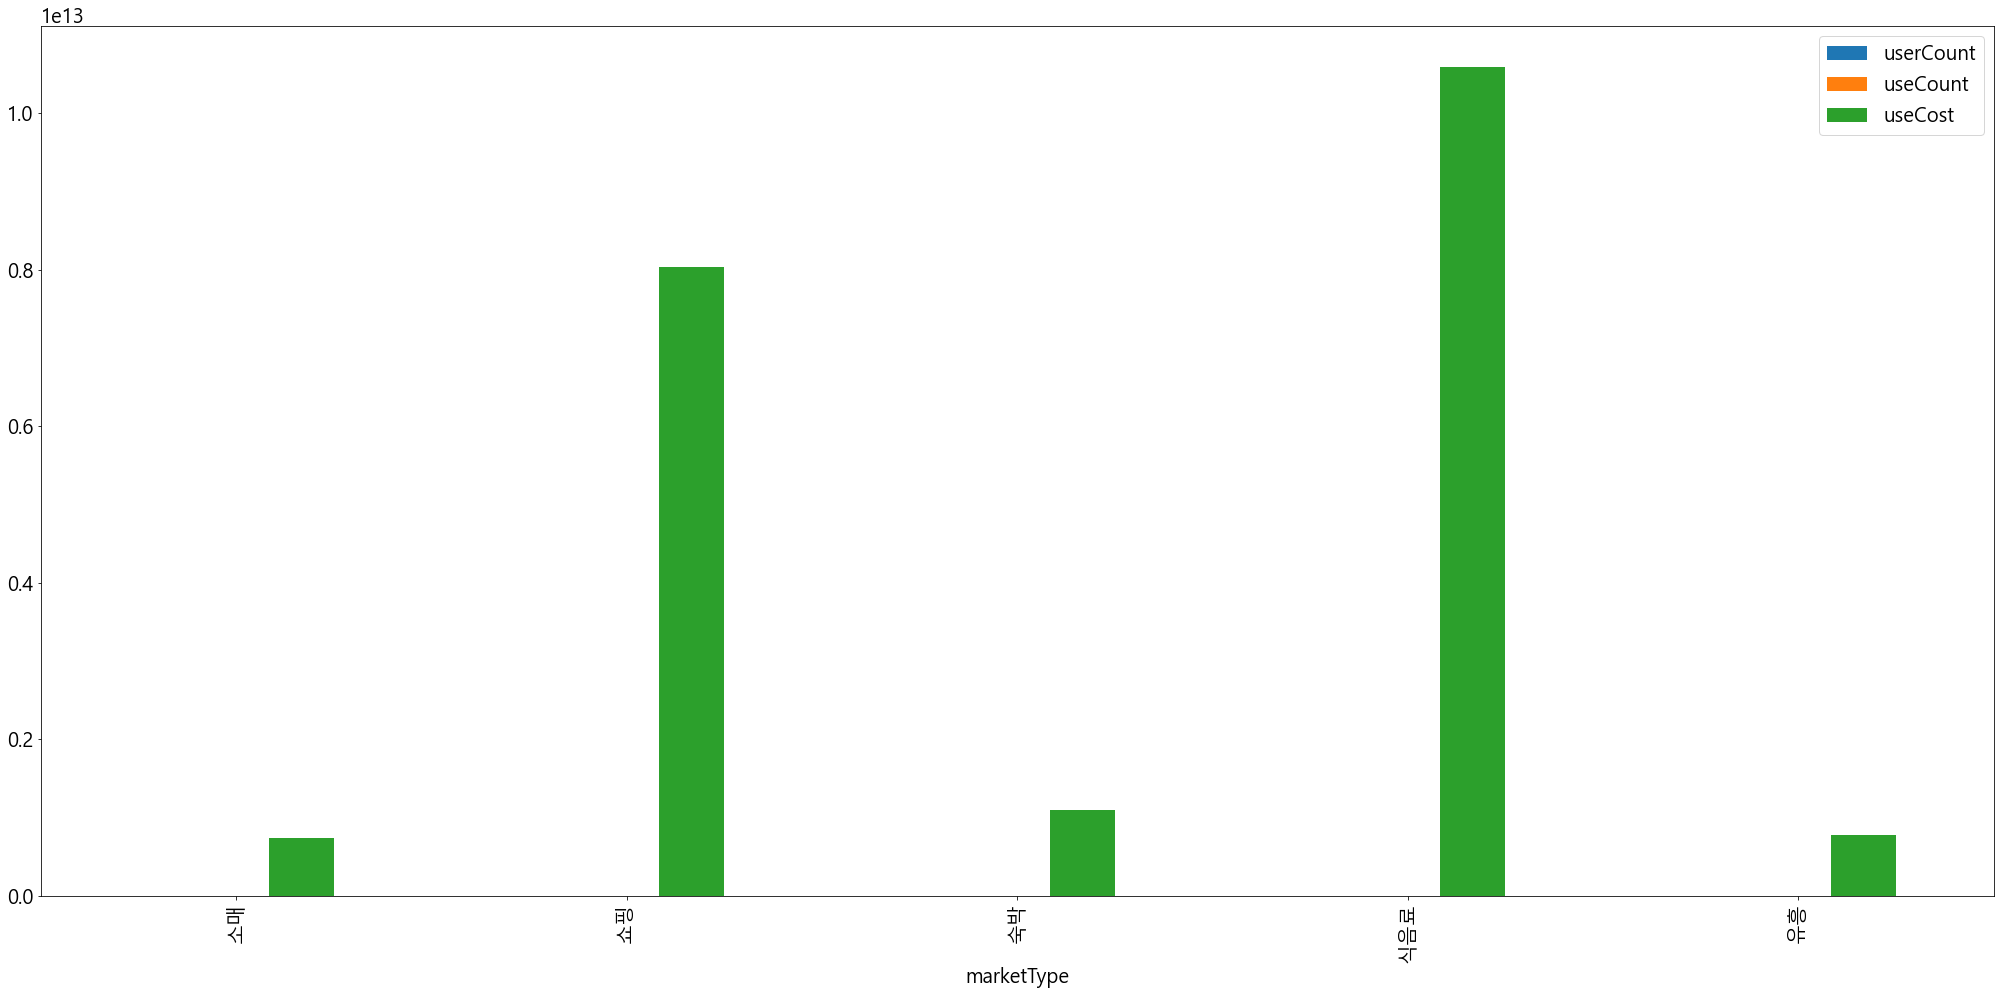

In [92]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (35, 16)

marketType.plot.bar()

In [2]:
# pandas 패키지 임포트
import pandas as pd

# read_excel() 함수를 이용하여 파일 불러오기
data = pd.read_excel('CustomerDataSet.xlsx')

# 데이터 몇 행만 보기
data

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


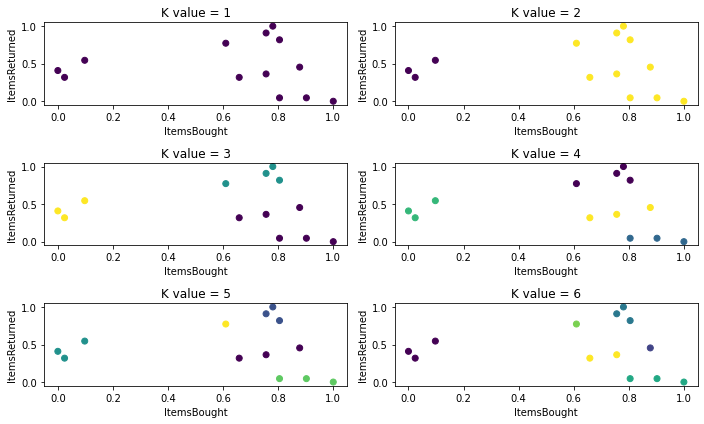

In [14]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = data.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(processed_data[['ItemsBought', 'ItemsReturned']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

# K 값을 늘려가며 반복 테스트 (우측 상단 extern해서 확인해주세요. 잘리네요 ㅠ)
for i in range(1, 7):
       # 클러스터 생성
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])

       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
    plt.subplot(3, 2, i)
    plt.tight_layout()

        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')

        # 클러스터링 그리기
    plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=ids)
        
plt.show()

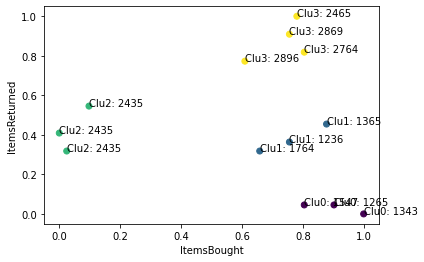

In [18]:
# K = 3으로 클러스터링
estimator = KMeans(n_clusters = 4)

# 클러스터링 생성
cluster_ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=cluster_ids)

# 제품과 클러스터 id로 데이터에 범례 달기
for index, c_id, bought, returned, zip_code, product in processed_data.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

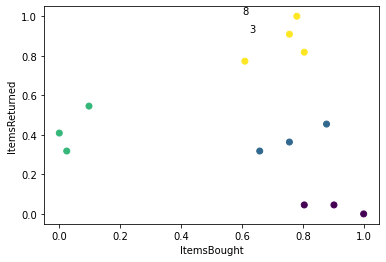

In [21]:
# 플로팅하기
plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=cluster_ids)

# 우편번호로 범례달기
for (index, c_id, bought, returned, zip_code, product) in processed_data.itertuples():
    plt.annotate(zip_code,(bought + 0.6, returned + 0.6))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()


In [4]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import numpy as np


In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
#use 10 fold cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #10개의 fold로 나눈다